## Task 1

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('E:/KAIM 2/KAIM 2 Week 10/Week10/data/BrentOilPrices.csv')

 Analyze the historical Brent oil prices data.

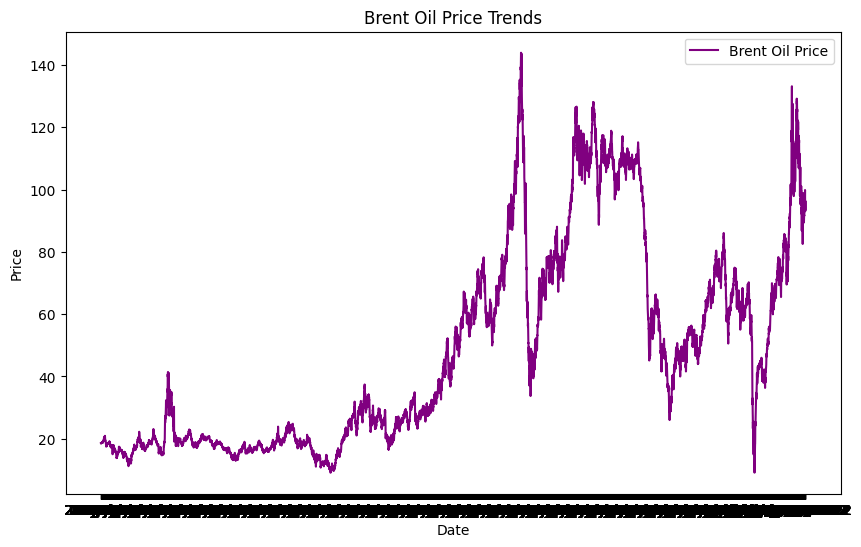

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Price Trends')
plt.legend()
plt.show()


In [4]:
highest_date = df.loc[df['Price'].idxmax(), 'Date']
highest_price = df['Price'].max()

print(f"Highest price occurred on {highest_date} with a price of ${highest_price:.2f}")


Highest price occurred on 03-Jul-08 with a price of $143.95


In [5]:
lowest_date = df.loc[df['Price'].idxmin(), 'Date']
lowest_price = df['Price'].min()

print(f"Lowest price occurred on {lowest_date} with a price of ${lowest_price:.2f}")


Lowest price occurred on 10-Dec-98 with a price of $9.10


In [6]:
# Use rolling averages (moving averages) to identify trends.
# Decompose the time series into trend, seasonal, and residual components.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Price'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

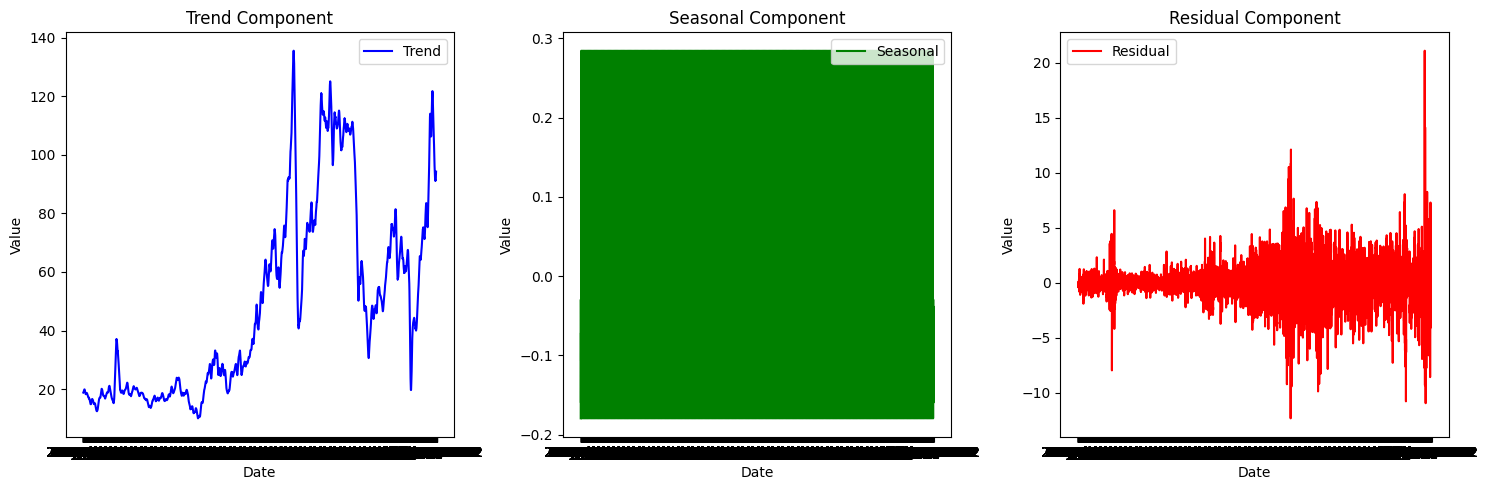

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the trend component
axes[0].plot(df['Date'], trend, label='Trend', color='blue')
axes[0].set_title('Trend Component')

# Plot the seasonal component
axes[1].plot(df['Date'], seasonal, label='Seasonal', color='green')
axes[1].set_title('Seasonal Component')

# Plot the residual component
axes[2].plot(df['Date'], residual, label='Residual', color='red')
axes[2].set_title('Residual Component')

# Add common labels
for ax in axes:
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()


In [8]:
#Plot the residuals to identify any unusual spikes or dips.
# Use statistical methods (e.g., Z-score, IQR) to detect outliers.
# Calculate Z-scores for residuals
z_scores = (residual - residual.mean()) / residual.std()
outliers = z_scores[abs(z_scores) > 2]

In [9]:
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


 The ARIMA (AutoRegressive Integrated Moving Average) model is a powerful time series forecasting algorithm

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
    # Prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    # Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate out-of-sample error
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print(f'ARIMA{order} MSE = {mse:.3f}')
                except:
                    continue
    print(f'Best ARIMA{best_cfg} MSE = {best_score:.3f}')

# Example usage
p_values = range(3)  
d_values = range(2)
q_values = range(3)
evaluate_models(df['Price'], p_values, d_values, q_values)


Best ARIMANone MSE = inf


In [20]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [21]:
# Define parameter ranges
p_values = range(3)  # Adjust as needed
d_values = range(2)
q_values = range(3)

In [22]:
def evaluate_arima_model(X, order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

In [23]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print(f'ARIMA {order} MSE = {mse:.3f}')
                except:
                    continue
    print(f'Best ARIMA {best_cfg} MSE = {best_score:.3f}')

In [24]:
# Example usage
evaluate_models(df['Price'], p_values, d_values, q_values)

Best ARIMA None MSE = inf


In [25]:
print(model_fit.summary())

NameError: name 'model_fit' is not defined

In [24]:
import pandas as pd

# Convert 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'date' as the index
df.set_index('Date', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)


C:\Users\ende\AppData\Local\Temp\ipykernel_12940\2802396139.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


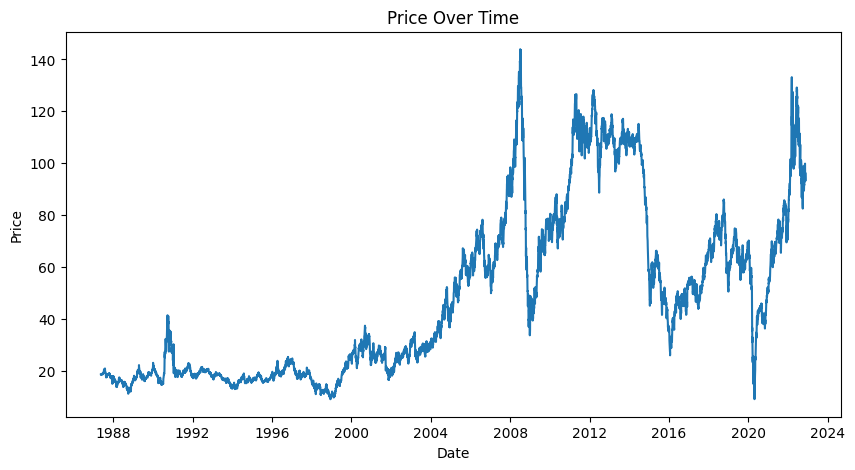

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -1.9938560113924697
p-value: 0.289273504893402
Critial Values:
   1%, -3.4310783342658615
Critial Values:
   5%, -2.861861876398633
Critial Values:
   10%, -2.566941329781918


In [30]:
df['price_diff'] = df['Price'].diff().dropna()


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order (p, d, q)
p = 1  # Auto-regressive part
d = 1  # Differencing part
q = 1  # Moving average part

# Fit the model
model = ARIMA(df['price_diff'].dropna(), order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\ende\anaconda3_new\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ende\anaconda3_new\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ende\anaconda3_new\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             price_diff   No. Observations:                 9010
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14548.419
Date:                Tue, 02 Jul 2024   AIC                          29102.837
Time:                        11:28:28   BIC                          29124.155
Sample:                             0   HQIC                         29110.091
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0254      0.006      4.266      0.000       0.014       0.037
ma.L1         -1.0000      0.006   -156.588      0.000      -1.013      -0.987
sigma2         1.4783      0.013    114.424      0.0

c:\Users\ende\anaconda3_new\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ende\anaconda3_new\envs\all\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


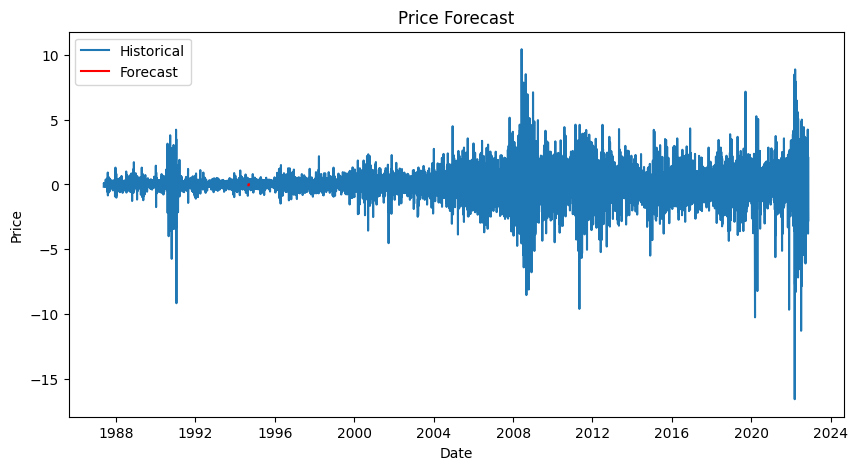

In [34]:
# Forecast the next steps
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['price_diff'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


AIC: 29102.83719725327
BIC: 29124.155135323224


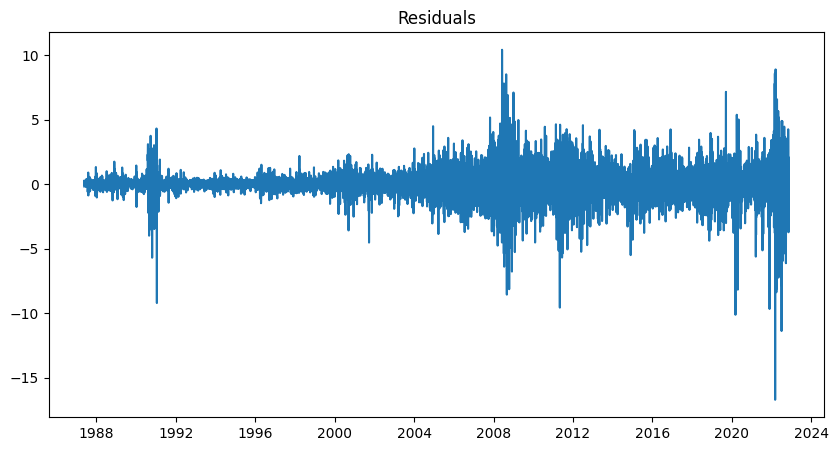

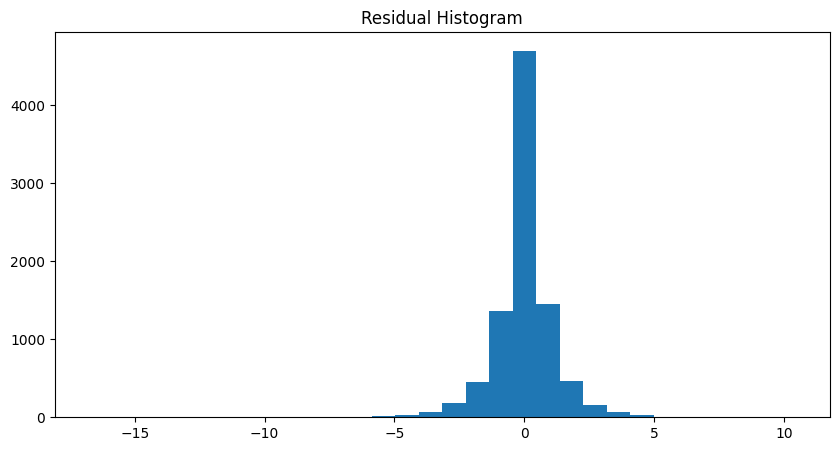

In [35]:
# AIC and BIC
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Residual diagnostics
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30)
plt.title('Residual Histogram')
plt.show()


In [36]:
import itertools
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")


In [37]:
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))


In [38]:
best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        temp_model = ARIMA(df['price_diff'].dropna(), order=param)
        temp_model_fit = temp_model.fit()
        if temp_model_fit.aic < best_aic:
            best_aic = temp_model_fit.aic
            best_pdq = param
    except:
        continue

print(f'Best order: {best_pdq} with AIC: {best_aic}')


Best order: (2, 0, 3) with AIC: 29052.374428644704
